In [ ]:
import numpy as np
with open("R23.txt", "r") as f:
  d, n, m, k, p = [int(x) for x in f.readline().split()]
  ks = [int(x) for x in f.readline().split()]
  data = [[float(x) for x in string.split()] for string in f.readlines()]
  data = np.array(data)

data.shape

(20686, 10)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embedded = pca.fit_transform(data)

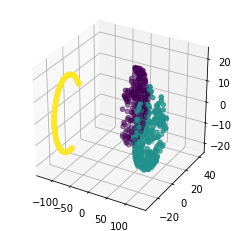

In [ ]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_embedded[:, 0], pca_embedded[:, 1], pca_embedded[:, 2], c = clustering.labels_)

plt.show()

In [ ]:
from sklearn import preprocessing
data_scaler = preprocessing.StandardScaler().fit_transform(data)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(labels[4])



In [ ]:
radius, center = sphere_fit(labels[1], 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embedded = pca.fit_transform(data)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embedded_ = pca.fit_transform(labels[3])


In [ ]:
with open('pca.txt', 'w') as f:
  for i in range(len(pca_embedded)):
    f.write(f'{to_str_c(pca_embedded[i])}\n')

In [ ]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3).fit(labels[0] - center)

In [ ]:
cri = []
radius, center = sphere_fit(labels[2], 2)
for i in range(1, max(ks) + 1):
  clustering = KMeans(n_clusters=i).fit(labels[2] - center)
  cri.append(clustering.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


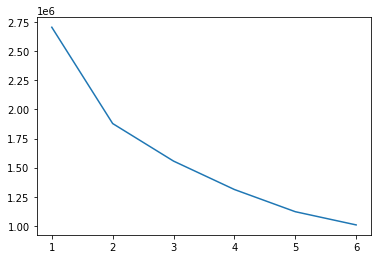

In [ ]:
plt.plot(range(1, max(ks) + 1), cri)

In [ ]:
ks

[3, 6, 5, 6, 4, 4, 5, 5]

In [ ]:
np.unique(clustering.labels_)

array([0, 1, 2], dtype=int32)

In [ ]:
clustering = KMeans(n_clusters=6).fit(labels[1] - center)

In [ ]:
import matplotlib.pyplot as plt

# plt.scatter(X_embedded[:,0], X_embedded[:,1]);

In [ ]:
from sklearn.cluster import SpectralClustering

clustering_1 = SpectralClustering(n_clusters=5, n_neighbors = 5, affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(labels[1])


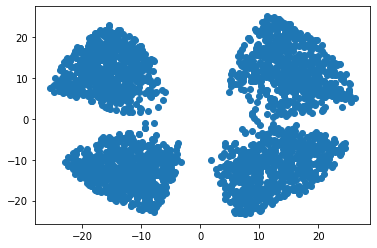

In [ ]:
plt.scatter(pca_embedded_[:,0], pca_embedded_[:,1]);

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
clf.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
np.argmin(clf.negative_outlier_factor_)

11281

In [ ]:
k = 20

idx = np.argpartition(clf.negative_outlier_factor_, 20)

outliers = idx[:k]
normals = idx[k:]
outliers

array([ 3453,  5970,  7630,  2353,  7894,   826,  6570,  2341,  7977,
        4714,  2652,   531,  4734,  8471, 11281,  2379,  1127,  1565,
        6488,  1022])

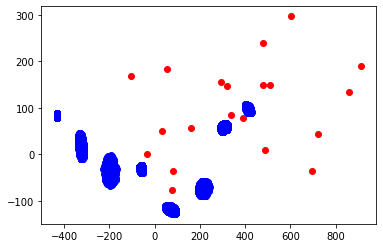

In [ ]:
plt.scatter(pca_embedded[outliers][:,0], pca_embedded[outliers][:,1], c = 'red')
plt.scatter(pca_embedded[normals][:,0], pca_embedded[normals][:,1], c = 'blue')
plt.show()

In [ ]:
pca_embedded[7977]

array([ 55.85434684, 183.37582761])

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=5, n_neighbors = 20, affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(labels[1])


In [ ]:
clustering.labels_

array([0, 0, 0, ..., 0, 3, 0], dtype=int32)

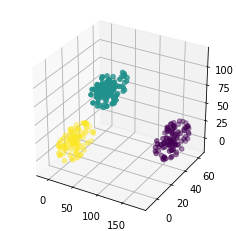

In [ ]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clustering.labels_)

plt.show()

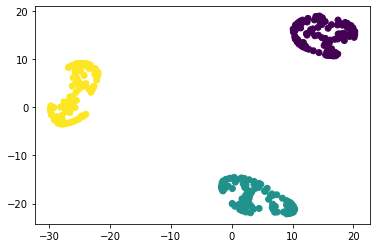

In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = clustering.labels_);

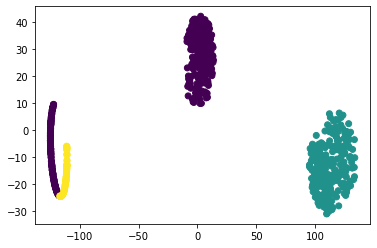

In [ ]:
plt.scatter(pca_embedded[:,0], pca_embedded[:,1], c = clustering.labels_);

In [ ]:
np.argmin(pca_embedded[:,1])

251

In [ ]:
data = np.array(data[:251].tolist() + data[252:].tolist())

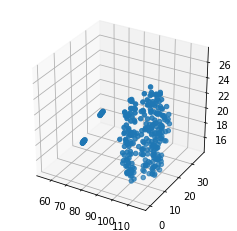

In [ ]:
label_0 = data[clustering.labels_ == 0] 

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(label_0[:, 0], label_0[:, 1], label_0[:, 2])
center_0 = np.mean(label_0, axis=0)
ax.scatter(center_0[0], center_0[1], center_0[2], color='red')

plt.show()

In [ ]:
print(f'center before optimization: {np.max(np.linalg.norm(label_0 - center_0, axis = 1))}')

def find_center_optm(center, data, lr=0.01, decay = 0.99, iter=10000):
  for i in range(iter):
    arg = np.argmax(np.linalg.norm(data - center, axis = 1))
    furtherest = data[arg]
    center += lr * (furtherest - center)
    lr *= decay
  print(lr)
  return center

center_0 = find_center_optm(center_0, label_0)
print(f'center after optimization: {np.max(np.linalg.norm(label_0 - center_0, axis = 1))}')

center before optimization: 21.520374619631298
2.2487748498162874e-46
center after optimization: 20.000000000000014


In [ ]:
np.max(distance_matrix(label_0, label_0)) / 2

19.99970211177011

In [ ]:
center_0

array([162.36956704,  44.11713767,  12.91543525])

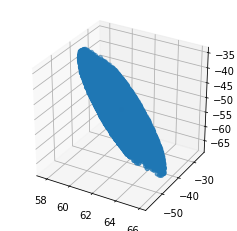

In [ ]:
label_1 = data[clustering.labels_ == 1] 

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(label_1[:, 0], label_1[:, 1], label_1[:, 2])

center_1 = np.mean(label_1, axis=0)
ax.scatter(center_1[0], center_1[1], center_1[2], color='red')



plt.show()

In [ ]:
print(f'center before optimization: {np.max(np.linalg.norm(label_1 - center_1, axis = 1))}')
center_1 = find_center_optm(center_1, label_1)
print(f'center after optimization: {np.max(np.linalg.norm(label_1 - center_1, axis = 1))}')

center before optimization: 17.115227256629524
2.2487748498162874e-46
center after optimization: 16.000000000000014


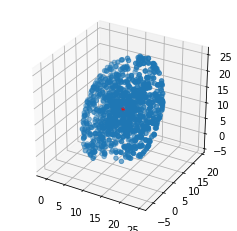

In [ ]:
label_2 = data[clustering.labels_ == 2] 

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(label_2[:, 0], label_2[:, 1], label_2[:, 2])

center_2 = np.mean(label_2, axis=0)
ax.scatter(center_2[0], center_2[1], center_2[2], color='red')

plt.show()

In [ ]:
print(f'center before optimization: {np.max(np.linalg.norm(label_2 - center_2, axis = 1))}')
center_2 = find_center_optm(center_2, label_2)
print(f'center after optimization: {np.max(np.linalg.norm(label_2 - center_2, axis = 1))}')

center before optimization: 16.85671179189966
2.2487748498162874e-46
center after optimization: 16.000000000000007


In [ ]:
np.linalg.norm(label_2 - center_2, axis = 1)

array([10.54538035, 11.15786065, 13.        , 11.32261616,  9.02040866,
       13.        , 13.        , 13.        , 13.        , 13.        ,
       13.        , 13.        , 13.        , 11.1974157 , 13.        ,
        3.58713368, 13.        , 13.        ,  4.40129215, 11.21186624,
       13.        ,  7.39429157, 13.        , 13.        , 10.53262312,
        4.71040418, 13.        ,  4.60094866, 13.        ,  6.53748415,
        2.62292462,  5.84559374, 13.        , 11.67325541, 10.40095468,
       13.        ,  8.25240502,  5.02822424, 13.        , 11.51264117,
        7.65581342,  3.46586203,  3.36111198,  4.43222215,  5.24772715,
        2.68930686,  3.79443796, 13.        ,  3.95170579, 13.        ,
        5.80222517,  5.20443737, 13.        , 13.        ,  6.02186363,
        6.76075921, 13.        , 13.        , 13.        , 13.        ,
        8.42342357, 13.        , 13.        ,  4.33515171, 13.        ,
       13.        , 13.        ,  5.17050207, 13.        ,  7.36

In [ ]:
print(f'center_0: {center_0}')
print(f'center_1: {center_1}')
print(f'center_2: {center_2}')

center_0: [110.43390936  -7.03085935  31.55036311]
center_1: [60.2964758  47.02225033 57.0160084 ]
center_2: [10.15904225 11.12868002  9.24688274]


In [ ]:
r_0, center_0 = sphereFit(label_0[:,0], label_0[:,1], label_0[:,2])
r_1, center_1 = sphereFit(label_1[:,0], label_1[:,1], label_1[:,2])
r_2, center_2 = sphereFit(label_2[:,0], label_2[:,1], label_2[:,2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


In [ ]:
center_0 = np.mean(label_0, axis=0)
center_1 = np.mean(label_0, axis=0)
center_2 = np.mean(label_0, axis=0)

array([163.16256377,  43.84639367,  14.39892178])

In [ ]:
label_2_w = np.array(np.where(clustering.labels_ == 2)) + 1

label_1_w = np.array(np.where(clustering.labels_ == 1)) + 1

label_0_w = np.array(np.where(clustering.labels_ == 0)) + 1



In [ ]:
str(label_0_w)

'[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18\n   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36\n   37  38  39  40  41  42  43  44  45  46  47  48  49  50  56  60  67  69\n   75  81  84  88  89  95  97  98 109 110 115 124 127 128 131 134 135 136\n  142 147 161 168 170 184 189 192 193 197 201 207 208 209 223 224 233 242\n  246 247 250 253 256 278 279 283 287 291]]'

In [ ]:
def to_str(data):
  ans = ""
  for i in range(len(data)):
    if data[i] > 251:
      ans += str(data[i] + 1) + " "
    else:
      ans += str(data[i]) + " "
  return ans

to_str(label_0_w[0].tolist())

'1751 1753 1756 1758 1759 1762 1767 1773 1777 1782 1785 1791 1796 1802 1803 1806 1807 1808 1811 1816 1817 1818 1825 1826 1829 1831 1832 1840 1844 1848 1851 1855 1859 1862 1868 1872 1875 1884 1887 1888 1893 1906 1910 1913 1914 1920 1921 1934 1938 1939 1946 1954 1960 1961 1962 1964 1977 1982 1985 1990 1993 1995 2002 2006 2007 2018 2023 2024 2025 2033 2034 2037 2040 2048 2049 2052 2054 2056 2057 2059 2060 2061 2064 2067 2068 2069 2076 2077 2080 2084 2086 2092 2102 2106 2107 2110 2112 2117 2118 2119 2120 2123 2127 2128 2131 2132 2141 2147 2151 2159 2161 2162 2164 2165 2169 2174 2177 2178 2181 2188 2190 2201 2206 2209 2210 2213 2214 2217 2219 2220 2222 2229 2233 2237 2244 2252 2259 2261 2263 2266 2269 2272 2274 2276 2280 2281 2282 2283 2284 2288 2291 2293 2300 2302 2307 2308 2311 2316 2319 2322 2329 2332 2336 2337 2341 2344 2349 2350 2351 2357 2364 2365 2367 2369 2370 2371 2372 2373 2378 2381 2383 2384 2386 2392 2394 2397 2398 2400 2404 2408 2410 2413 2417 2423 2430 2431 2441 2442 2448 2449

In [ ]:
from scipy.linalg import null_space

In [ ]:
A0 = label_0 - center_0
P0 = null_space(A0)
B0 = label_0 @ P0

In [ ]:
A0 = label_0 - center_0
P0 = null_space(A0)

In [ ]:
P0

array([[-0.05956588],
       [ 0.96215908],
       [ 0.19286432],
       [ 0.18304416]])

In [ ]:
A1 = label_1 - center_1
P1 = null_space(A1)[:,0]
B1 = label_1 @ P1

In [ ]:
A2 = label_2 - center_2
P2 = null_space(A2)[:,0]
B2 = label_2 @ P2

In [ ]:
with open("output.txt", "w") as f:
  f.write(f'{n} {m}\n')
  f.write(f'{2} {1} Sphere\n')
  f.write(f'{to_str(P0.tolist())}\n')
  f.write(f'{B0[0]}\n')
  f.write(f'{to_str(center_0.tolist())} {np.round(np.max(np.linalg.norm(label_0 - center_0, axis = 1)), 6)}\n')
  f.write(f'{len(label_0_w[0])} {to_str(label_0_w[0].tolist())}\n')
  f.write(f'{2} {1} Sphere\n')
  f.write(f'{to_str(P1.tolist())}\n')
  f.write(f'{B1[0]}\n')
  f.write(f'{to_str(center_1.tolist())} {np.round(np.max(np.linalg.norm(label_1 - center_1, axis = 1)), 6)}\n')
  f.write(f'{len(label_1_w[0])} {to_str(label_1_w[0].tolist())}\n')
  f.write(f'{2} {1} Sphere\n')
  f.write(f'{to_str(P2.tolist())}\n')
  f.write(f'{B2[0]}\n')
  f.write(f'{to_str(center_2.tolist())} {np.round(np.max(np.linalg.norm(label_2 - center_2, axis = 1)), 6)}\n')
  f.write(f'{len(label_2_w[0])} {to_str(label_2_w[0].tolist())}\n')
  f.write(f'0\n')
  f.close()
  


In [ ]:
with open("output.txt", "w") as f:
  f.write(f'{n} {m}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_0.tolist())} {np.round(np.max(np.linalg.norm(label_0 - center_0, axis = 1)), 6)}\n')
  f.write(f'{len(label_0_w[0])} {to_str(label_0_w[0].tolist())}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_1.tolist())} {np.round(np.max(np.linalg.norm(label_1 - center_1, axis = 1)), 6)}\n')
  f.write(f'{len(label_1_w[0])} {to_str(label_1_w[0].tolist())}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_2.tolist())} {np.round(np.max(np.linalg.norm(label_2 - center_2, axis = 1)), 6)}\n')
  f.write(f'{len(label_2_w[0])} {to_str(label_2_w[0].tolist())}\n')
  f.write(f'0\n')
  f.close()

In [ ]:
with open("output.txt", "w") as f:
  f.write(f'{n} {m}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_0.tolist())} {r_0}\n')
  f.write(f'{len(label_0_w[0])} {to_str(label_0_w[0].tolist())}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_1.tolist())} {r_1}\n')
  f.write(f'{len(label_1_w[0])} {to_str(label_1_w[0].tolist())}\n')
  f.write(f'{3} {1} Sphere\n')
  f.write(f'\n')
  f.write(f'{to_str(center_2.tolist())} {r_2}\n')
  f.write(f'{len(label_2_w[0])} {to_str(label_2_w[0].tolist())}\n')
  f.write(f'0\n')
  f.close()
  


#R13

In [ ]:
label_3 = data[clustering.labels_ == 3] 
center_3 = np.mean(label_3, axis=0)

In [ ]:
label_4 = data[clustering.labels_ == 4] 
center_4 = np.mean(label_4, axis=0)

In [ ]:
print(f'center before optimization: {np.max(np.linalg.norm(label_3 - center_3, axis = 1))}')
center_3 = find_center_optm(center_3, label_3)
print(f'center after optimization: {np.max(np.linalg.norm(label_3 - center_3, axis = 1))}')

center before optimization: 16.613602878925498
2.2487748498162874e-46
center after optimization: 16.00000000000002


In [ ]:
print(f'center before optimization: {np.max(np.linalg.norm(label_4 - center_4, axis = 1))}')
center_4 = find_center_optm(center_4, label_4)
print(f'center after optimization: {np.max(np.linalg.norm(label_4 - center_4, axis = 1))}')

center before optimization: 16.800767544782058
2.2487748498162874e-46
center after optimization: 16.000000000000007


In [ ]:
A3 = label_3 - center_3
P3 = null_space(A3)[:,0]
B3 = label_3 @ P3

In [ ]:
A4 = label_4 - center_4
P4 = null_space(A4)[:,0]
B4 = label_4 @ P4

In [ ]:
null_space(A1)

array([[ 9.77284346e-01],
       [ 2.04150470e-01],
       [-2.32544129e-05],
       [ 5.69024777e-02]])

In [ ]:
label_4_w = np.array(np.where(clustering.labels_ == 4)) + 1

label_3_w = np.array(np.where(clustering.labels_ == 3)) + 1

In [ ]:
def to_str_c(data):
  ans = ""
  for i in range(len(data)):
    ans += str(data[i] + 1) + " "
  return ans


In [ ]:
with open("output.txt", "w") as f:
  f.write(f'{n} {m}\n')

  f.write(f'{3} {1} Sphere\n')
  f.write(f'{to_str_c(P0.tolist())}\n')
  f.write(f'{B0[0]}\n')
  f.write(f'{to_str_c(center_0.tolist())} {np.round(np.max(np.linalg.norm(label_0 - center_0, axis = 1)), 6)}\n')
  f.write(f'{len(label_0_w[0])} {to_str(label_0_w[0].tolist())}\n')

  f.write(f'{3} {1} Sphere\n')
  f.write(f'{to_str_c(P1.tolist())}\n')
  f.write(f'{B1[0]}\n')
  f.write(f'{to_str_c(center_1.tolist())} {np.round(np.max(np.linalg.norm(label_1 - center_1, axis = 1)), 6)}\n')
  f.write(f'{len(label_1_w[0])} {to_str(label_1_w[0].tolist())}\n')

  f.write(f'{3} {1} Sphere\n')
  f.write(f'{to_str_c(P2.tolist())}\n')
  f.write(f'{B2[0]}\n')
  f.write(f'{to_str_c(center_2.tolist())} {np.round(np.max(np.linalg.norm(label_2 - center_2, axis = 1)), 6)}\n')
  f.write(f'{len(label_2_w[0])} {to_str(label_2_w[0].tolist())}\n')

  f.write(f'{3} {1} Sphere\n')
  f.write(f'{to_str_c(P3.tolist())}\n')
  f.write(f'{B3[0]}\n')
  f.write(f'{to_str_c(center_3.tolist())} {np.round(np.max(np.linalg.norm(label_3 - center_3, axis = 1)), 6)}\n')
  f.write(f'{len(label_3_w[0])} {to_str(label_3_w[0].tolist())}\n')

  f.write(f'{3} {1} Sphere\n')
  f.write(f'{to_str_c(P4.tolist())}\n')
  f.write(f'{B4[0]}\n')
  f.write(f'{to_str_c(center_4.tolist())} {np.round(np.max(np.linalg.norm(label_4 - center_4, axis = 1)), 6)}\n')
  f.write(f'{len(label_4_w[0])} {to_str(label_4_w[0].tolist())}\n')

  f.write(f'1\n')
  f.write(f'252')
  f.close()
  


#Clean Clustering

##Reading Dataset

In [ ]:
import numpy as np
with open("R23.txt", "r") as f:
  d, n, m, k, p = [int(x) for x in f.readline().split()]
  ks = [int(x) for x in f.readline().split()]
  data = [[float(x) for x in string.split()] for string in f.readlines()]
  data = np.array(data)

data.shape

(20686, 10)

In [ ]:
# outlier = np.array([])
outlier = outliers
removed_outlier_data = np.delete(data, outlier, axis=0)
# removed_outlier_data = data

In [ ]:
removed_outlier_data.shape

(20666, 10)

In [ ]:
m

8

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embedded = pca.fit_transform(removed_outlier_data)


In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=m, n_neighbors = 50, affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(pca_embedded)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

clustering = KMeans(n_clusters=m, random_state=0).fit(pca_embedded)


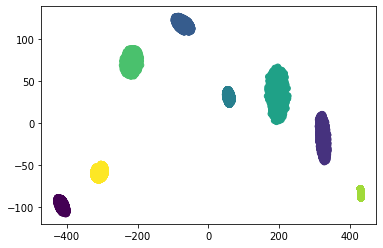

In [ ]:
plt.scatter(pca_embedded[:,0], pca_embedded[:,1], c = clustering.labels_);

In [ ]:
def find_center_optm(center, data, lr=0.01, decay = 0.99, iter=10000):
  for i in range(iter):
    arg = np.argmax(np.linalg.norm(data - center, axis = 1))
    furtherest = data[arg]
    center += lr * (furtherest - center)
    lr *= decay
  return center

In [ ]:
labels = []
centers = []
radia = []
for i in range(m):
  labels.append(removed_outlier_data[clustering.labels_ == i])
  centers.append(np.mean(labels[-1], axis=0))
  centers[-1] = find_center_optm(centers[-1], labels[-1])
  radia.append(np.max(np.linalg.norm(labels[-1] - centers[-1], axis = 1)))

In [ ]:
radia

[26.39244329292792,
 31.259798932768653,
 33.008166906015795,
 26.262610090546477,
 34.46110187907015,
 29.075668466882384,
 25.076250269397764,
 27.01752014451774]

In [ ]:
from scipy.linalg import null_space

In [ ]:
def to_str_c(data):
  ans = ""
  for i in range(len(data)):
    ans += str(data[i]) + " "
  return ans

In [ ]:
ks

[3, 6, 5, 6, 4, 4, 5, 5]

In [ ]:
clusters_with_outlier = list(clustering.labels_)
for i in range(len(outliers)):
  clusters_with_outlier.insert(sorted(outliers)[i], m)
outliers

array([ 3453,  5970,  7630,  2353,  7894,   826,  6570,  2341,  7977,
        4714,  2652,   531,  4734,  8471, 11281,  2379,  1127,  1565,
        6488,  1022])

In [ ]:
clusters_with_outlier = np.array(clusters_with_outlier)

In [ ]:
clusters_with_outlier[3454]

0

In [ ]:
# clusters_with_outlier = np.insert(clustering.labels_, outlier, m)
# clusters_with_outlier = clustering.labels_
clusters_num = [3, 6, 5, 4, 4, 5, 5, 6]
ne = [30] * m
def get_sphere_data(label, center, radius, c, cnum=1):
  # A = label - center
  # P = null_space(A)
  # di = P.shape[1]
  di = find_dimension(label)
  # B = label[0] @ P
  ans = f'{di} {cnum} Sphere\n'
  # for i in range(di):
  #   ans += f'{to_str_c(P[:,i])}\n'
  PJ = calculate_orth(label, di)
  for jj in range(len(PJ)):
    ans += f'{to_str_c(PJ[jj])}\n'
  # ans += f'{to_str_c(B)}\n'
  
  for jj in range(len(PJ)):
    ans += f'{(np.mean(label, axis=0) @ PJ.T)[jj]} '
  ans += f'\n'
  
  radius, center = sphere_fit(label, 1)
  ans += f'{to_str_c(center)} {np.round(radius, 2)}\n'
  # ans += f'{to_str_c(center)} {np.round(np.max(np.linalg.norm(label - center, axis = 1)), 6)}\n'
  indices = np.array(np.where(clusters_with_outlier == c)) + 1

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = ne[c], affinity = 'nearest_neighbors', 
    assign_labels='kmeans',
    random_state=0).fit(label)

  for jj in range(cnum):
    temp = indices[0][clustering_t.labels_ == jj] 
    ans += f'{len(temp)} {(to_str_c(temp))}\n'

  
  # ans += f'{len(indices[0])} {(to_str_c(indices[0]))}\n'
  return ans


In [ ]:
# clusters_with_outlier = np.insert(clustering.labels_, outlier, m)
clusters_with_outlier = clustering.labels_
clusters_num = [3, 5, 5]
ne = [5, 15, 20]
def get_sphere_data(label, center, radius, c, cnum=1):
  # A = label - center
  # P = null_space(A)
  # di = P.shape[1]
  di = find_dimension(label)
  # B = label[0] @ P
  ans = f'{di} {cnum} Sphere\n'
  # for i in range(di):
  #   ans += f'{to_str_c(P[:,i])}\n'
  PJ = calculate_orth(label, di)
  for jj in range(len(PJ)):
    ans += f'{to_str_c(PJ[jj])}\n'
  # ans += f'{to_str_c(B)}\n'
  
  for jj in range(len(PJ)):
    ans += f'{(np.mean(label, axis=0) @ PJ.T)[jj]} '
  ans += f'\n'
  
  radius, center = sphere_fit(label, 1)
  ans += f'{to_str_c(center)} {np.round(radius, 2)}\n'
  # ans += f'{to_str_c(center)} {np.round(np.max(np.linalg.norm(label - center, axis = 1)), 6)}\n'
  indices = np.array(np.where(clusters_with_outlier == c)) + 1

  if c == 1:
    X_emb = TSNE(n_components=3, learning_rate='auto',
                      init='random').fit_transform(label)

    clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = ne[c], affinity = 'nearest_neighbors', 
         assign_labels='kmeans',
         random_state=0).fit(X_emb)
  else:
    clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = ne[c], affinity = 'nearest_neighbors', 
          assign_labels='kmeans',
          random_state=0).fit(label)

  for jj in range(cnum):
    temp = indices[0][clustering_t.labels_ == jj] 
    ans += f'{len(temp)} {(to_str_c(temp))}\n'

  
  # ans += f'{len(indices[0])} {(to_str_c(indices[0]))}\n'
  return ans


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
def view(label):
    pca = PCA(n_components=d)
    pca_emb = pca.fit_transform(label)
    print(d)
    plt.plot(np.arange(1, d + 1), pca.explained_variance_)
    print(pca.explained_variance_)
    plt.show()

10
[1.73267415e+02 1.67354078e+02 1.26792874e+02 1.16323372e+02
 9.60952191e+01 1.64511207e-27 3.72249899e-30 7.82718468e-31
 5.34412247e-31 8.41095390e-32]


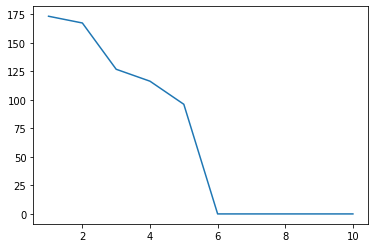

In [ ]:
view(labels[0])

In [ ]:
def calculate_orth(label, dim=3):
  pca = PCA(n_components=d)
  pca_emb = pca.fit_transform(label)
  return pca.components_[dim:]

In [ ]:
def check_unique(col, val):
  ans = np.unique(col)
  return len(ans) == val

def find_dimension(label):
  for i in range(d + 1):
    A = np.round(label @ calculate_orth(label, i).T)
    if np.all(check_unique(A, d - i)):
      return i
    
find_dimension(labels[7])

3

In [ ]:
def sphere_fit(point_cloud, lam):
    """
    input
        point_cloud: xyz of the point clouds　numpy array
    output
        radius : radius of the sphere
        sphere_center : xyz of the sphere center
    """

    A_1 = np.zeros((d,d))
    #A_1 : 1st item of A
    v_1 = np.array([0.0] * d)
    v_2 = 0.0
    v_3 = np.array([0.0] * d)
    # mean of multiplier of point vector of the point_clouds
    # v_1, v_3 : vector, v_2 : scalar

    N = len(point_cloud)
    #N : number of the points

    """Calculation of the sum(sigma)"""
    for v in point_cloud:
        v_1 += v
        v_2 += np.dot(v, v)
        v_3 += np.dot(v, v) * v

        A_1 += np.dot(np.array([v]).T, np.array([v]))

    v_1 /= N
    v_2 /= N
    v_3 /= N
    A = 2 * (A_1 / N - np.dot(np.array([v_1]).T, np.array([v_1]))) + np.eye(d, d) * lam / 2
    # formula ②
    b = v_3 - v_2 * v_1 + lam / 2 * v_1
    # formula ③
    # sphere_center = np.dot(np.linalg.inv(A), b)
    sphere_center = np.linalg.lstsq(A, b)[0]
    #　formula ①
    radius = (sum(np.linalg.norm(np.array(point_cloud) - sphere_center, axis=1))
              /len(point_cloud))

    return(radius, sphere_center)

In [ ]:
sphere_fit(labels[2], 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(12.966793176254379,
 array([ 59.16557558,  25.16625105,  16.20618853,   2.14512336,
         27.76709603,  37.22810947,  -5.66002086,  37.33108992,
         28.24911706, -14.80617095]))

In [ ]:
isSphere = [True] * 20
ans = f'{n} {m}\n'
for i in range(m):
  if isSphere[i]:
    ans += get_sphere_data(labels[i], centers[i], radia[i], i, clusters_num[i])
ans += f'{len(outlier)} {to_str_c(outlier + 1)}'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep us

In [ ]:
with open("output.txt", "w") as f:
  f.write(ans)

In [ ]:
len(clusters_with_outlier)

5001